<a href="https://colab.research.google.com/github/priba/kornia-examples/blob/master/color_adjust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Color adjustment

In this tutorial we are going to learn how to adjust the color in image batches.

## Install Kornia

In [0]:
!pip install git+https://github.com/arraiyopensource/kornia

import kornia
print(f"Kornia version: {kornia.__version__}")

  Cloning https://github.com/arraiyopensource/kornia to /tmp/pip-req-build-kuqoc_i2
  Running command git clone -q https://github.com/arraiyopensource/kornia /tmp/pip-req-build-kuqoc_i2
  Created wheel for kornia: filename=kornia-0.1.2+a0bafcd-py2.py3-none-any.whl size=124831 sha256=21ad438936755e25e3232c224051ef410edd509efa4989ff5e6b9e93056856cd
  Stored in directory: /tmp/pip-ephem-wheel-cache-wdh3ohxo/wheels/a0/47/86/854e2f9a801b368f296cb25f167cbd56aa805f974b15421a67
Successfully built kornia
Kornia version: 0.1.2+a0bafcd


## Prepare the data

Download an example image

In [0]:
!wget https://raw.githubusercontent.com/kornia/kornia/master/examples/data/ninja_turtles.jpg

--2019-12-13 12:05:46--  https://raw.githubusercontent.com/kornia/kornia/master/examples/data/ninja_turtles.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239772 (234K) [image/jpeg]
Saving to: ‘ninja_turtles.jpg.1’

ninja_turtles.jpg.1 100%[===================>] 234.15K  --.-KB/s    in 0.03s   

2019-12-13 12:05:46 (7.92 MB/s) - ‘ninja_turtles.jpg.1’ saved [239772/239772]



Load the image using OpenCV and plot it


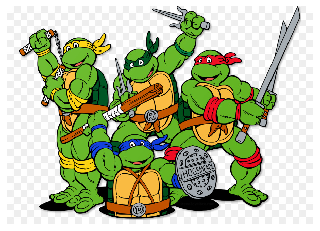

In [0]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# load using opencv and convert to RGB
img_bgr: np.array = cv2.imread('ninja_turtles.jpg', cv2.IMREAD_COLOR)
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb); plt.axis('off');

Create a batch of 4 identical images and normalize it between [0,1]


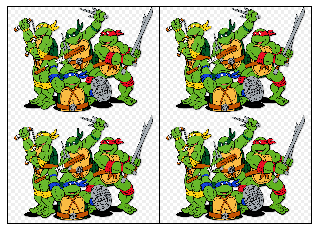

In [0]:
import torch
import torchvision

def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.array = kornia.tensor_to_image(out)
    plt.imshow(out_np); plt.axis('off');

# stack four identical images
data: torch.Tensor = kornia.image_to_tensor(img_rgb)  # 1xCxHxW
data = data.expand(4, -1, -1, -1)  # 4xCxHxW

# normalize
data = kornia.normalize(data.float(), torch.zeros(3), 255. * torch.ones(3))

# plot
imshow(data)

## Perform the color adjustments


### Brightness

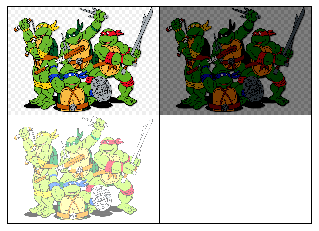

In [0]:
# Brightness
x_brightness: torch.Tensor = kornia.adjust_brightness(data, torch.Tensor([0, -0.5, 0.5, 1]))
imshow(x_brightness)

### Contrast

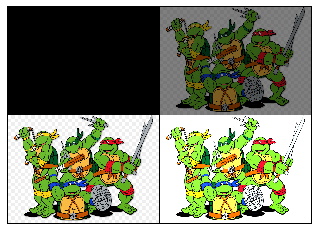

In [0]:
# Contrast
x_contrast: torch.Tensor = kornia.adjust_contrast(data, torch.Tensor([0, 0.5, 1, 1.5]))
imshow(x_contrast)

### Gamma

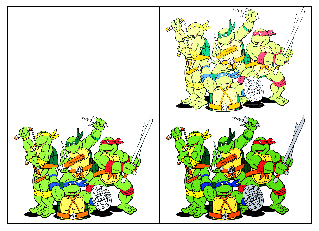

In [0]:
# Gamma
x_gamma: torch.Tensor = kornia.adjust_gamma(data, gamma=torch.Tensor([0, 0.5, 1, 1.5]), gain=1.5)
imshow(x_gamma)

### Saturation

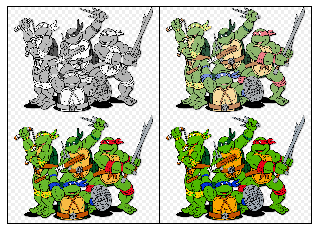

In [0]:
# Saturation
x_saturated: torch.Tensor = kornia.adjust_saturation(data, torch.Tensor([0, 0.5, 1, 1.5]))
imshow(x_saturated)

### Hue

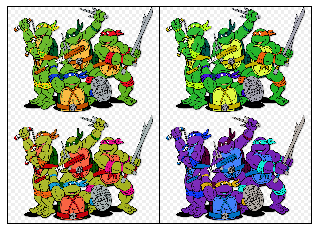

In [0]:
# Hue
x_hue: torch.Tensor = kornia.adjust_hue(data, torch.Tensor([0, 0.5, -0.5, kornia.pi]))
imshow(x_hue)